 lowpass filter
 sample rate, fs=250.0 
 cutoff_hz = 3 
 width of transition, width=2 hz 
 ripple_db=53
 FIR filter size: numtaps = 395, time = 1.58 s, delay = 197 , delay_time = 0.79 s
 Filter length=395 distorts the first and last 0.7880  seconds of each epoch (= 197 samples at 250.0 samples / s)


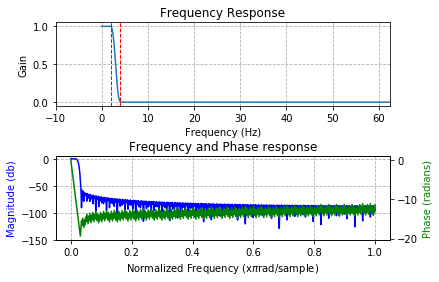

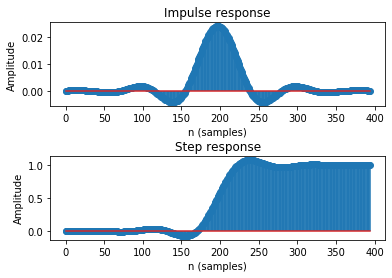

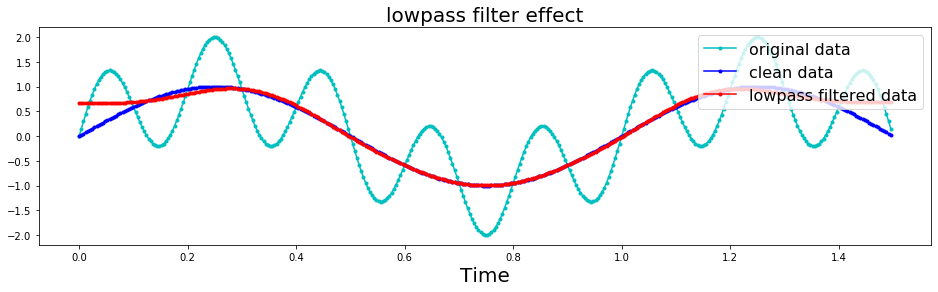

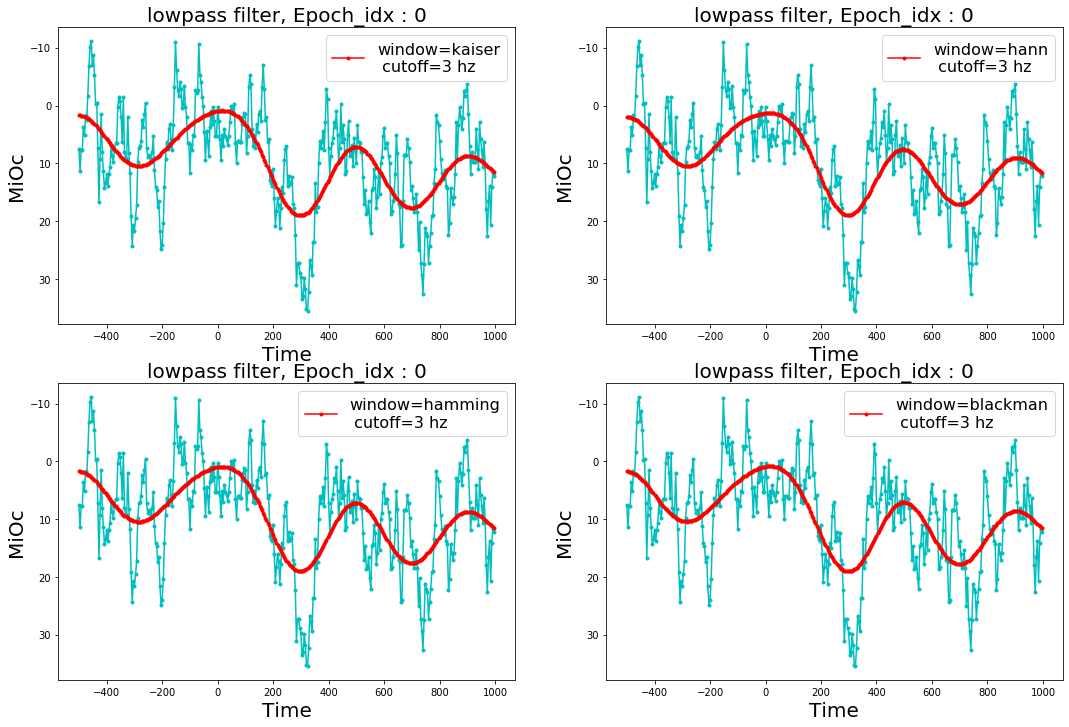

 lowpass filter
 sample rate, fs=250.0 
 cutoff_hz = 5 
 width of transition, width=2 hz 
 ripple_db=53
 FIR filter size: numtaps = 395, time = 1.58 s, delay = 197 , delay_time = 0.79 s
 Filter length=395 distorts the first and last 0.7880  seconds of each epoch (= 197 samples at 250.0 samples / s)


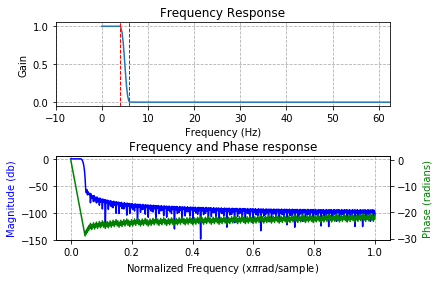

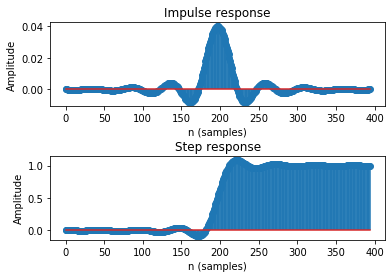

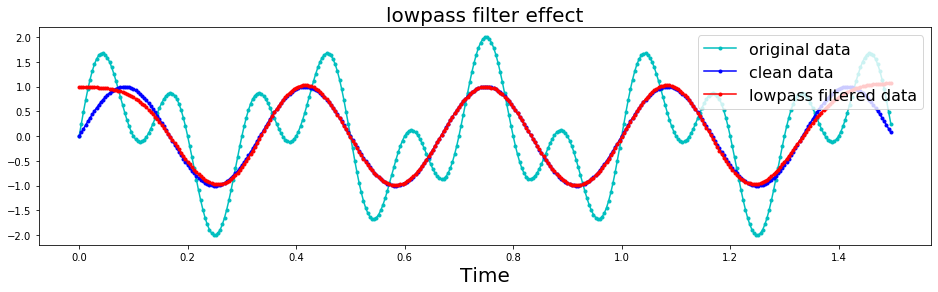

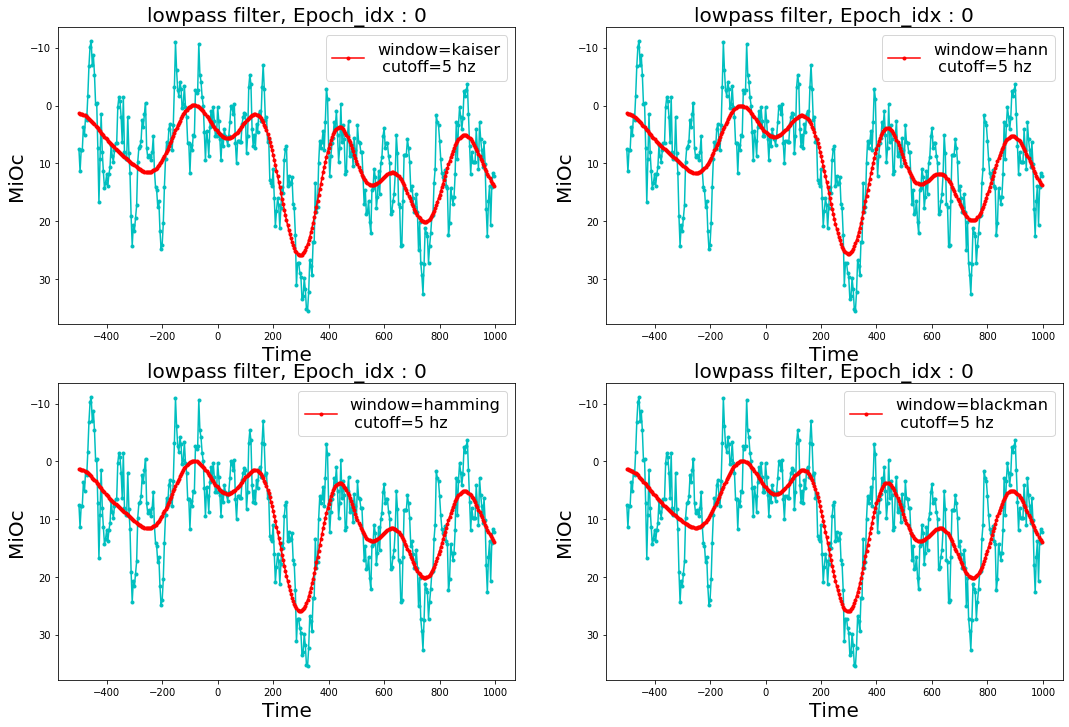

 lowpass filter
 sample rate, fs=250.0 
 cutoff_hz = 8 
 width of transition, width=2.0 hz 
 ripple_db=53
 FIR filter size: numtaps = 395, time = 1.58 s, delay = 197 , delay_time = 0.79 s
 Filter length=395 distorts the first and last 0.7880  seconds of each epoch (= 197 samples at 250.0 samples / s)


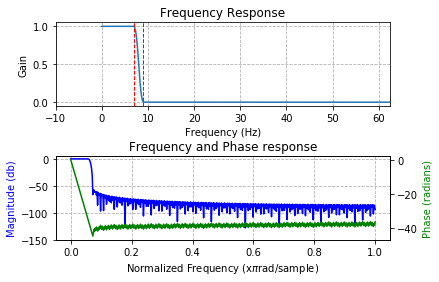

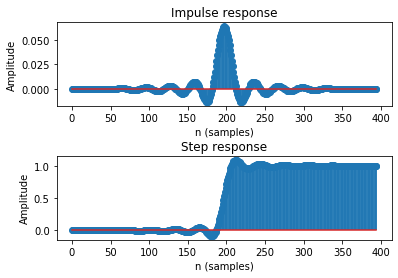

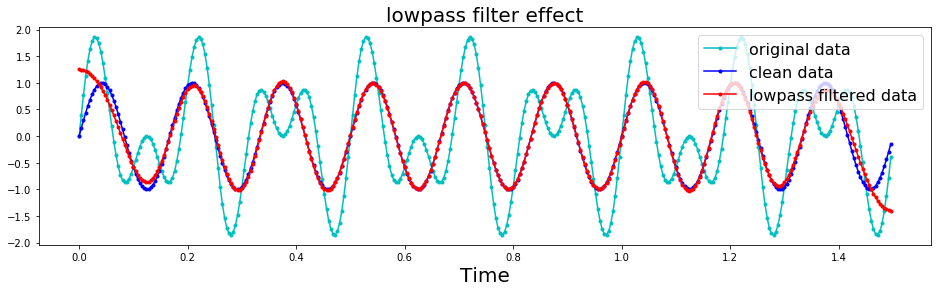

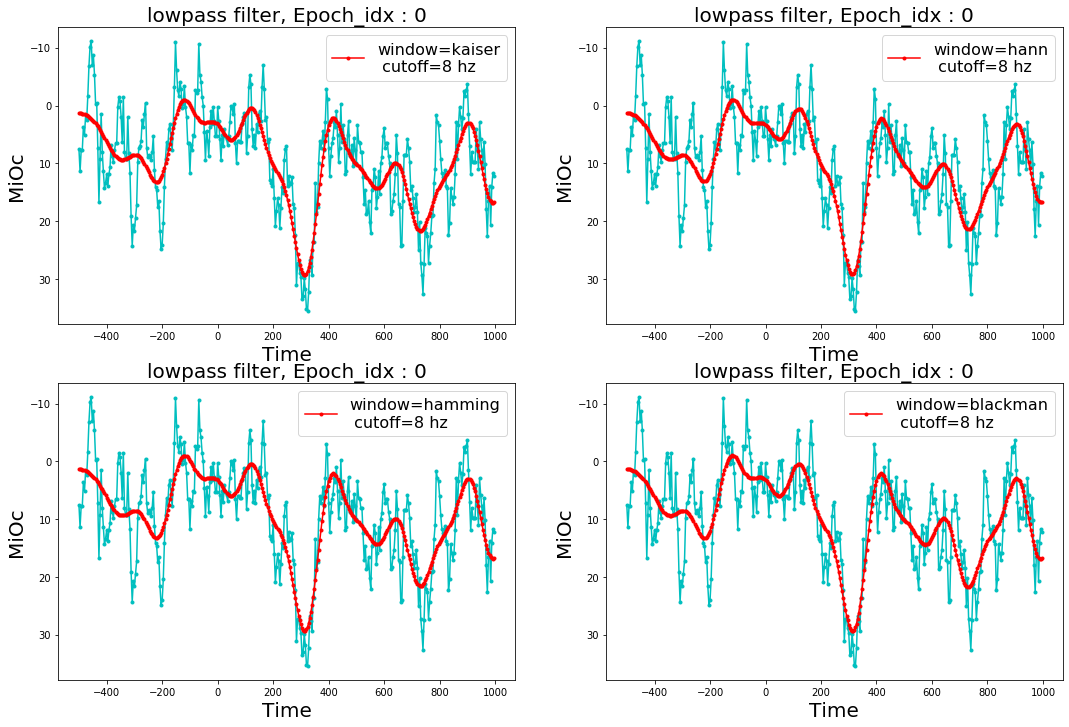

 lowpass filter
 sample rate, fs=250.0 
 cutoff_hz = 10 
 width of transition, width=2.5 hz 
 ripple_db=53
 FIR filter size: numtaps = 315, time = 1.26 s, delay = 157 , delay_time = 0.63 s
 Filter length=315 distorts the first and last 0.6280  seconds of each epoch (= 157 samples at 250.0 samples / s)


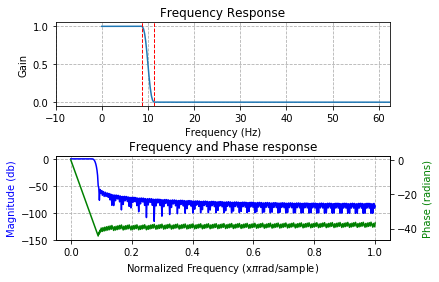

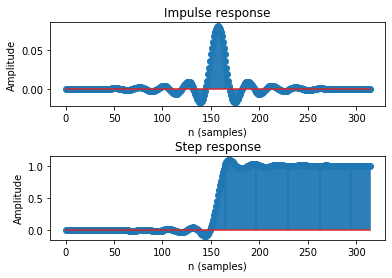

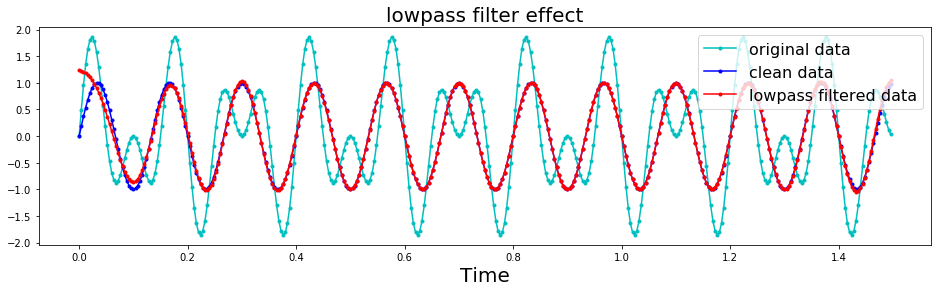

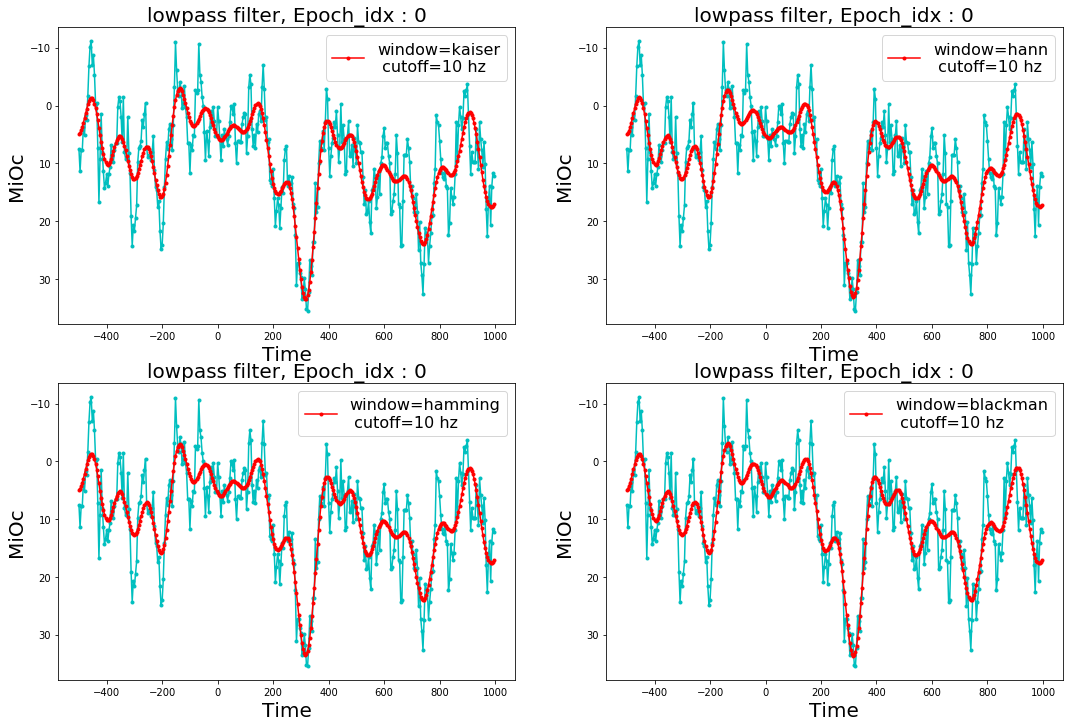

 lowpass filter
 sample rate, fs=250.0 
 cutoff_hz = 12 
 width of transition, width=3.0 hz 
 ripple_db=53
 FIR filter size: numtaps = 263, time = 1.052 s, delay = 131 , delay_time = 0.526 s
 Filter length=263 distorts the first and last 0.5240  seconds of each epoch (= 131 samples at 250.0 samples / s)


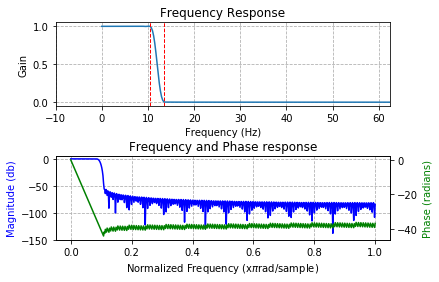

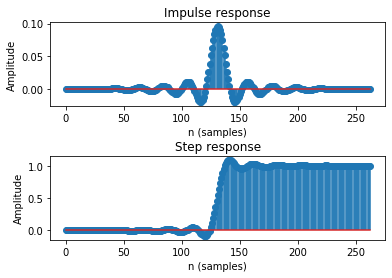

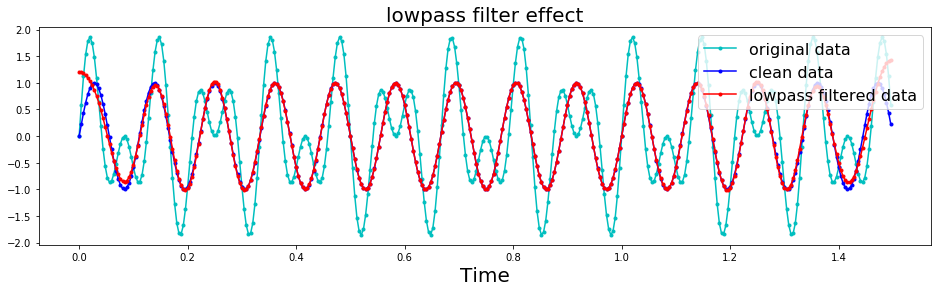

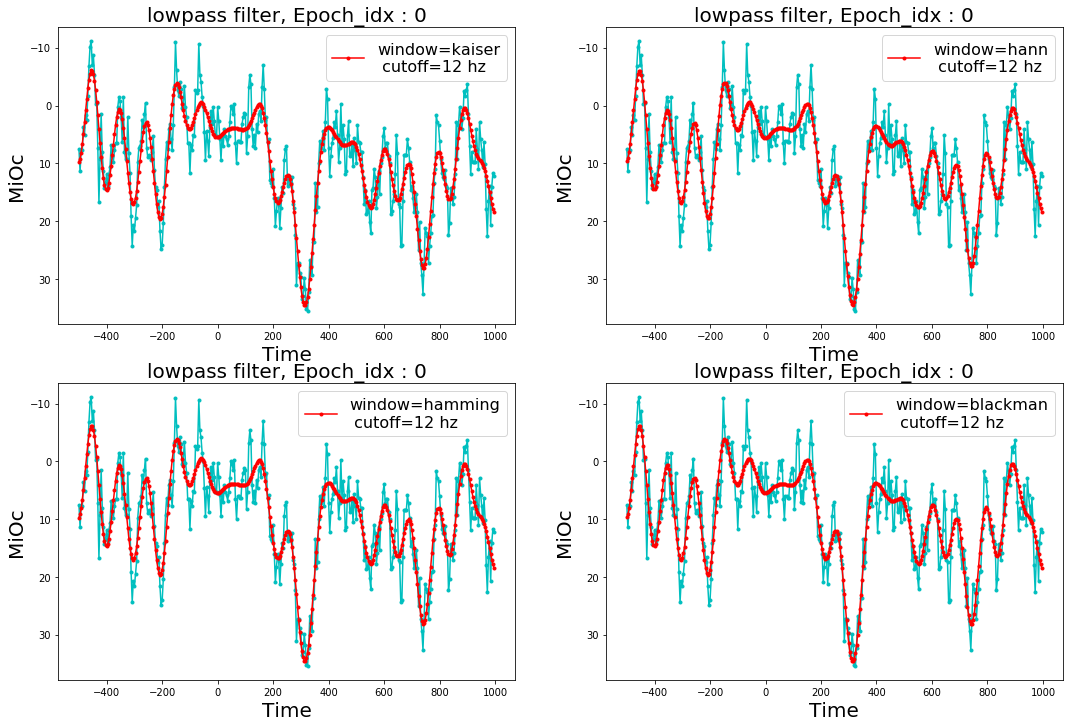

 lowpass filter
 sample rate, fs=250.0 
 cutoff_hz = 20 
 width of transition, width=5.0 hz 
 ripple_db=53
 FIR filter size: numtaps = 159, time = 0.636 s, delay = 79 , delay_time = 0.318 s
 Filter length=159 distorts the first and last 0.3160  seconds of each epoch (= 79 samples at 250.0 samples / s)


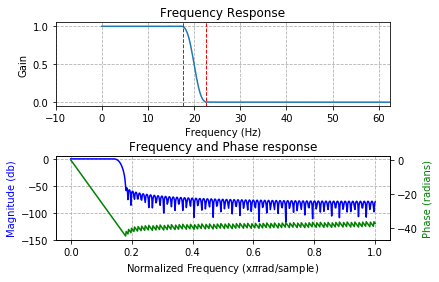

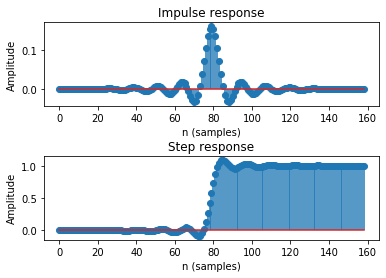

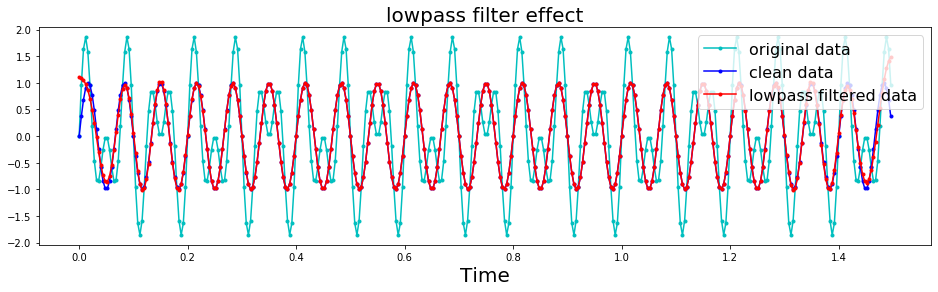

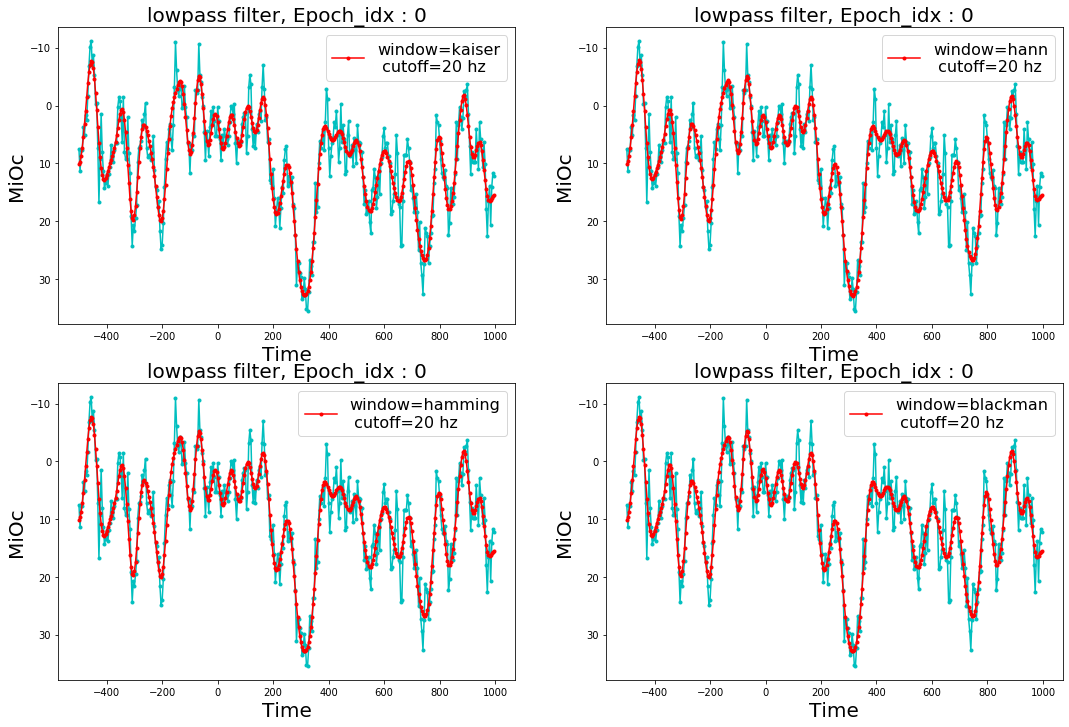

 lowpass filter
 sample rate, fs=250.0 
 cutoff_hz = 25 
 width of transition, width=6.25 hz 
 ripple_db=53
 FIR filter size: numtaps = 127, time = 0.508 s, delay = 63 , delay_time = 0.254 s
 Filter length=127 distorts the first and last 0.2520  seconds of each epoch (= 63 samples at 250.0 samples / s)


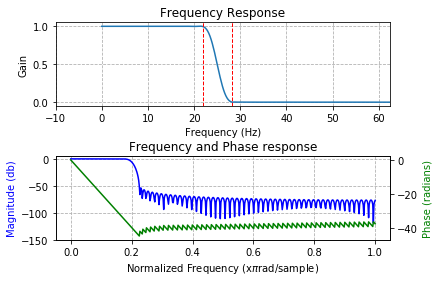

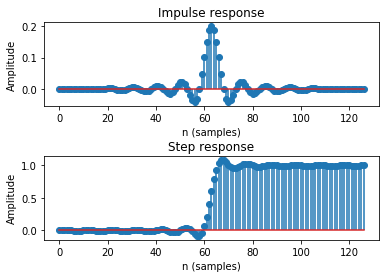

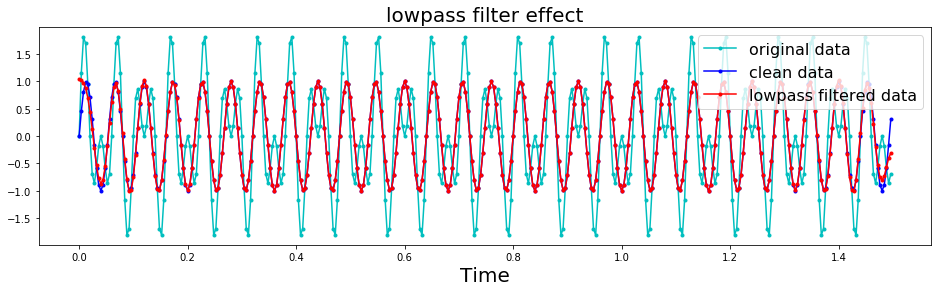

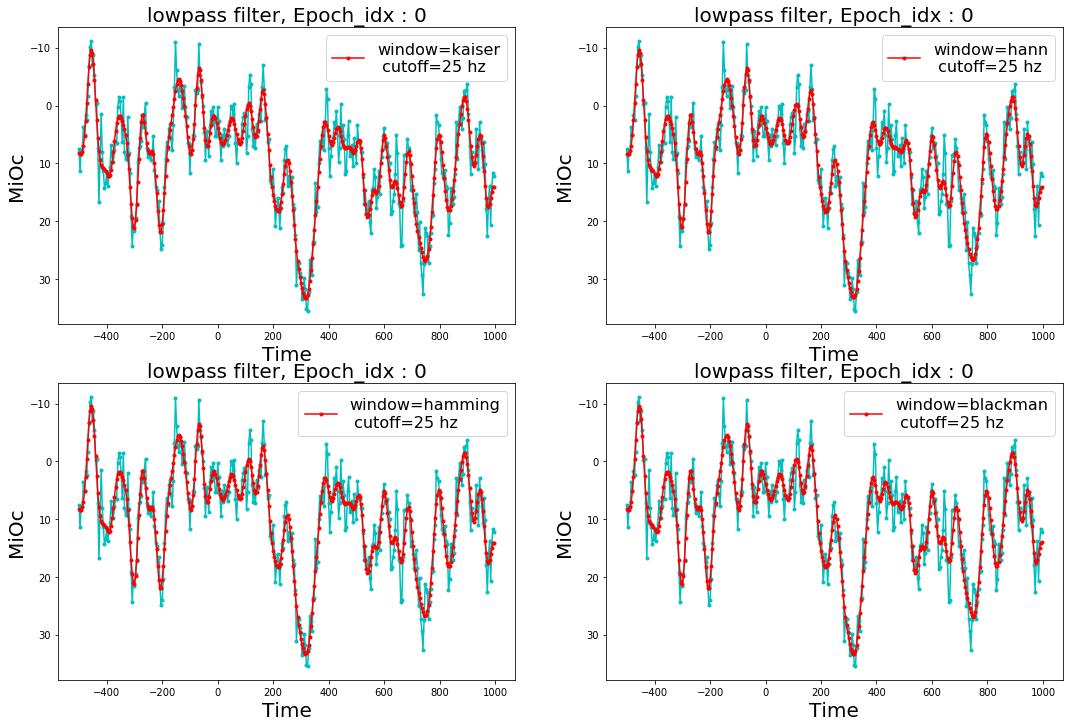

 lowpass filter
 sample rate, fs=250.0 
 cutoff_hz = 30 
 width of transition, width=7.5 hz 
 ripple_db=53
 FIR filter size: numtaps = 107, time = 0.428 s, delay = 53 , delay_time = 0.214 s
 Filter length=107 distorts the first and last 0.2120  seconds of each epoch (= 53 samples at 250.0 samples / s)


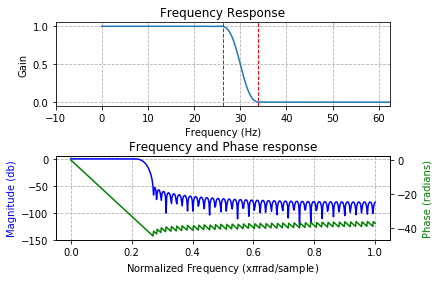

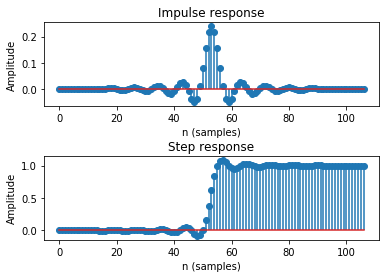

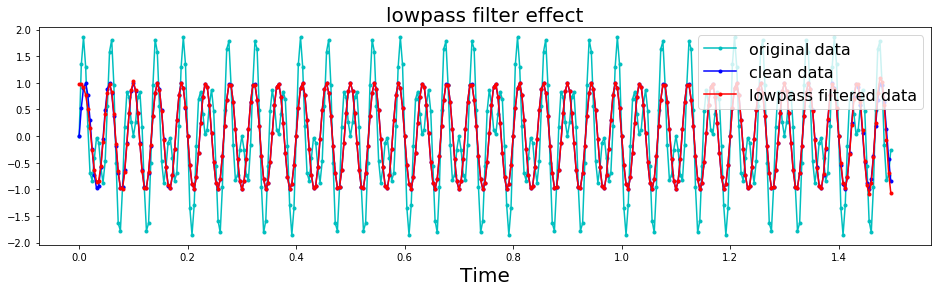

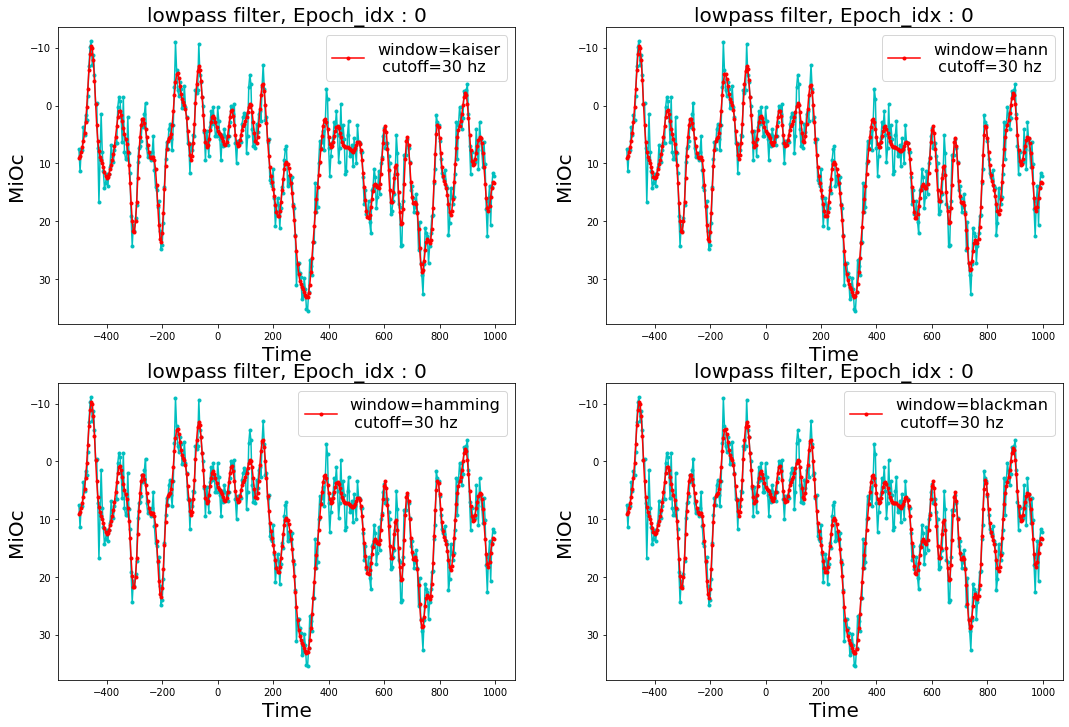

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import spudtr.filters as filters
from spudtr import DATA_DIR

plt.clf()
plt.close('all')

ftype = 'lowpass'  # 'highpass'
sfreq = 250.0
cutoff_list = [3,5,8,10,12,20,25,30]
window_list = ['kaiser','hamming','hann','blackman']

_f, _key = DATA_DIR / "gh_sub000p3.epochs.h5", "p3"
epochs_df = pd.read_hdf(_f, _key)
#epochs_df = epf._hdf_read_epochs(DATA_DIR / _f, _key)
eeg_streams = ["MiPf", "MiCe", "MiPa", "MiOc"]
epoch_id = "epoch_id"
time = "time_ms"

chan = 3
channel_id = chan

for epoch_i in range(1):
      epoch1=epochs_df[epochs_df[epoch_id] == epoch_i]
      for cutoff_hz in cutoff_list:
           filters.show_filter(cutoff_hz, sfreq, ftype)
           #filters.show_filter(cutoff_hz, sfreq, ftype, sample_effect=False);

           # show epochs filter results for different window and cutoff
           n = 0
           fig, ax_all = plt.subplots(2,2,figsize=(18,12))
           for window in window_list:

               filt_epochs_df = filters.fir_filter_dt(
                   epochs_df, eeg_streams, cutoff_hz, sfreq, ftype, window=window)

               epoch2=filt_epochs_df[filt_epochs_df[epoch_id] == epoch_i]

               y1=epoch1[eeg_streams].iloc[:,channel_id] #epoch1 is original epoch data
               y2=epoch2[eeg_streams].iloc[:,channel_id] #epoch2 is filtered epoch data
               t1 = epoch1[time]
               t2 = epoch2[time]
               num=epoch1.index.size
            
               n = n + 1
               if n==1:
                  ax = ax_all[0,0]
               elif n==2:
                  ax = ax_all[1,0]
               elif n==3:
                  ax = ax_all[0,1]
               elif n==4:
                  ax = ax_all[1,1]
               
               ax.plot(t1,y1, '.-',  color= 'c', linestyle='-')
               ax.plot(t2,y2, '.-',  color= 'r', linestyle='-', label=f"window={window}\n cutoff={cutoff_hz} hz")
 
               ax.invert_yaxis()

               ax.set_title(f"{ftype} filter, Epoch_idx : {epoch_i}", fontsize=20)
               ax.set_xlabel('Time', fontsize=20)
               ax.set_ylabel(eeg_streams[channel_id], fontsize=20)
               ax.legend(fontsize=16,loc=1)

           plt.show()